In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('/content/ICLatency.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X, y)

# Now you can use this model to predict IC latency for new data
# For example, if you want to predict IC latency for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [512]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy*100}%")
# Predicting IC latency for new data
predicted_ic_latency = model.predict(new_data)
print("Predicted IC Latency:", predicted_ic_latency)


Training Accuracy: 88.4507687475867%
Predicted IC Latency: [[ 5581.417     9892.6122    6178.1719   10536.9598    7157.6891
  11181.33      8135.2326   11825.67      6485.1587   12470.044
   6908.1456   13114.385     7333.1093   10867.073     3591.8963
   3598.3203    3951.6357    3238.2529    4311.3716    3331.1522
   4671.111     3424.0528    5030.8507    3514.9744    5390.5863
   3607.8745    5384.7668     988.40291    597.32267   1079.3267
    613.13534   1168.2735     630.92458   1259.1951     648.7139
   1348.1407     664.52657   1439.0631     526.16555     18.878277]]


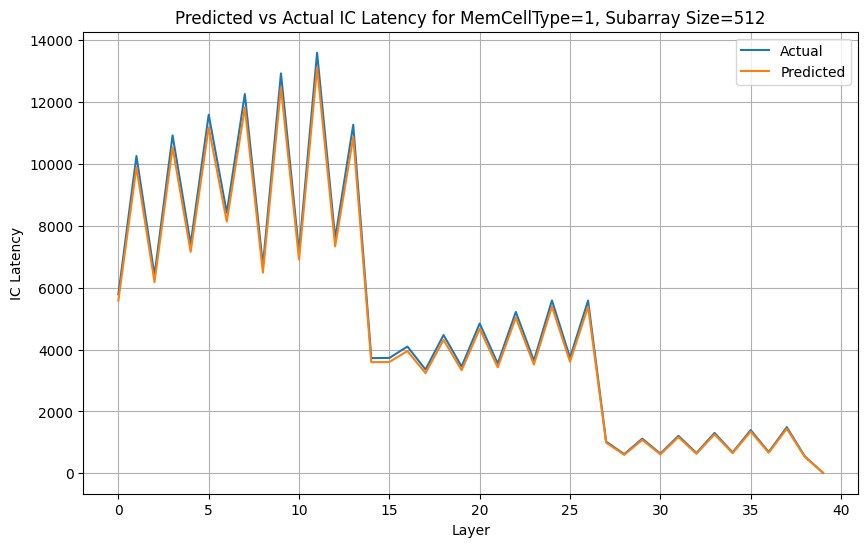

In [ ]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual ICLatency values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted ICLatency and the actual ICLatency values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_ic_latency[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('IC Latency')
plt.title(f'Predicted vs Actual IC Latency for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.8270788987314578


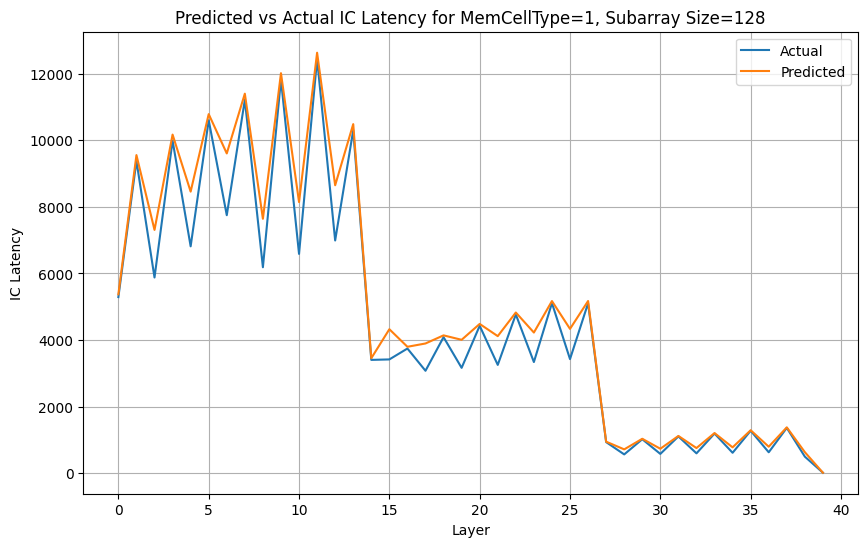

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/ICLatency.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X_train, y_train)

# Predicting ICLatency for the testing data
predicted_ic_latency_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual ICLatency values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual ICLatency values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual ICLatency values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_ic_latency_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('IC Latency')
    plt.title(f'Predicted vs Actual IC Latency for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")
